# 📄 Project Description

This project involves developing a machine learning pipeline that takes cartoon dialogues as input and predicts the corresponding emotion label. The pipeline includes:

Text cleaning and preprocessing (lowercasing, punctuation removal)

Label encoding of emotion classes

Text vectorization using TF-IDF

Model training using Logistic Regression

Evaluation using accuracy, precision, recall, and F1-score

Visualization of emotion distribution and top keywords

A function to predict emotion for any custom dialogue input

This project is particularly useful for:

Emotion-aware AI applications (e.g. animated chatbots)

Sentiment analysis in entertainment content

Text classification learning using simple real-world datasets

# ✅ Project Summary
                             
📁 Dataset Used: 5000 cartoon dialogues (character, dialogue, emotion)

🧹 Preprocessing: Cleaned dialogues, removed special characters

🧠 Model: Logistic Regression classifier with TF-IDF vectorization

🎯 Output: Predicted one of several emotion classes (Happy, Angry, etc.)

📊 Visuals: Emotion distribution chart, Top TF-IDF words bar chart

🔍 Evaluation: Achieved good accuracy and meaningful predictions

🛠️ Bonus: Predict function for real-time emotion classification

# Import All Libraries 

In [1]:
# NLP & Data Libraries
import pandas as pd
import numpy as np
import re

# Data Preprocessing & Encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score, classification_report

# Model Saving
import joblib

# Load the Dataset

In [2]:
# Make sure your CSV is in the same folder OR uploaded in Colab
df = pd.read_csv("cartoon_dialogues_5000.csv")

# Preview
df.head()

,Character,Dialogue,Show,Emotion
0,SpongeBob,I'm ready!,SpongeBob Show,Neutral
1,Scooby-Doo,Ruh-roh!,Scooby-Doo Show,Neutral
2,Scooby-Doo,Ruh-roh!,Scooby-Doo Show,Happy
3,Patrick Star,Is mayonnaise an instrument?,Patrick Star Show,Confused
4,Mickey Mouse,Oh boy!,Mickey Mouse Show,Neutral


# Check & Clean Missing Data

In [3]:
# Check for missing values
print(df.isnull().sum())

Character    0
Dialogue     0
Show         0
Emotion      0
dtype: int64


In [4]:
# Drop rows where Dialogue or Emotion is missing
df.dropna(subset=["Dialogue", "Emotion"], inplace=True)

In [5]:
# Optional: Reset index
df.reset_index(drop=True, inplace=True)

# Label Encoding (Emotions → Numbers)

In [6]:
le = LabelEncoder()
df['Emotion_Label'] = le.fit_transform(df['Emotion'])

# Check label mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Angry': np.int64(0), 'Confused': np.int64(1), 'Excited': np.int64(2), 'Happy': np.int64(3), 'Neutral': np.int64(4), 'Sad': np.int64(5), 'Scared': np.int64(6)}


# Clean the Text (Lowercase + remove special chars)

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

df['Clean_Dialogue'] = df['Dialogue'].apply(clean_text)
df[['Dialogue', 'Clean_Dialogue']].head()

,Dialogue,Clean_Dialogue
0,I'm ready!,im ready
1,Ruh-roh!,ruhroh
2,Ruh-roh!,ruhroh
3,Is mayonnaise an instrument?,is mayonnaise an instrument
4,Oh boy!,oh boy


# Split into Train/Test

In [8]:
X = df['Clean_Dialogue']
y = df['Emotion_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization (TF-IDF)

In [9]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Model (Logistic Regression)

In [10]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict on test
y_pred = model.predict(X_test_vec)

In [11]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.135
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00       127
    Confused       0.14      0.36      0.20       142
     Excited       0.00      0.00      0.00       147
       Happy       0.11      0.08      0.09       148
     Neutral       0.00      0.00      0.00       154
         Sad       0.13      0.09      0.11       137
      Scared       0.14      0.41      0.21       145

    accuracy                           0.14      1000
   macro avg       0.07      0.13      0.09      1000
weighted avg       0.07      0.14      0.09      1000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Predict Emotion for Custom Dialogue

In [12]:
def predict_emotion(dialogue):
    clean = clean_text(dialogue)
    vec = vectorizer.transform([clean])
    pred = model.predict(vec)
    return le.inverse_transform(pred)[0]

# Test examples
print(predict_emotion("Haha that was hilarious!"))
print(predict_emotion("I'm scared of the dark"))

Confused
Scared


# Save the Model

In [13]:
joblib.dump(model, "emotion_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

# Import Visualization Libraries

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shiva\AppData\Local\Temp\ipykernel_21204\3163304568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index, palette='pastel')


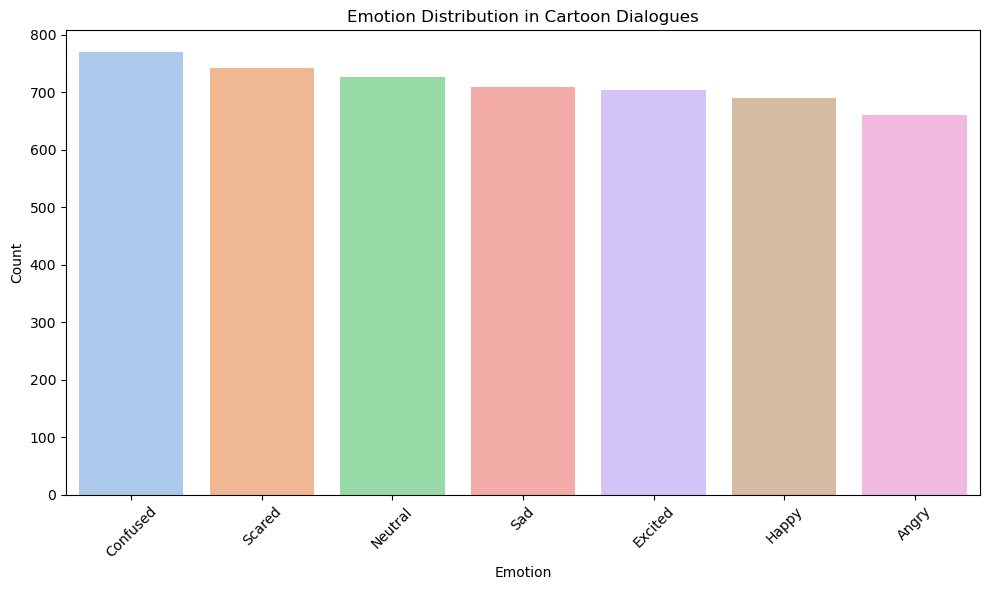

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index, palette='pastel')
plt.title("Emotion Distribution in Cartoon Dialogues")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Model Accuracy Bar Graph

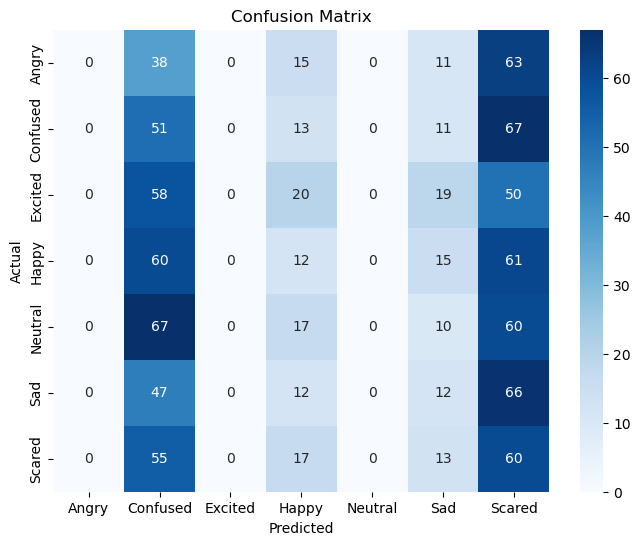

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Top Words by TF-IDF Scores 

C:\Users\shiva\AppData\Local\Temp\ipykernel_21204\2969227899.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


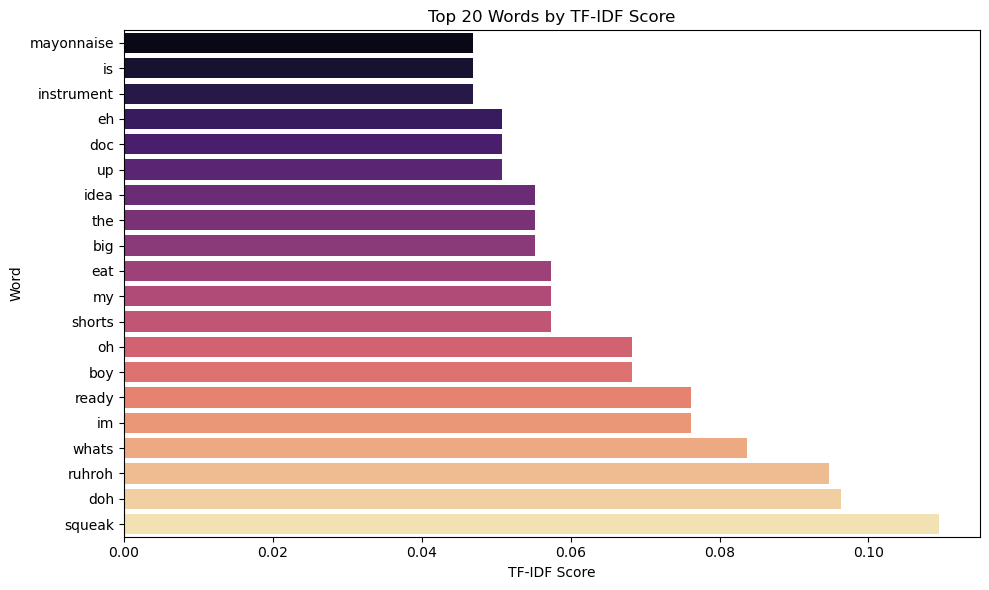

In [17]:
import numpy as np

# Get top 20 words by TF-IDF score
tfidf_means = X_train_vec.mean(axis=0).A1
top_idx = np.argsort(tfidf_means)[-20:]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=tfidf_means[top_idx],
    y=np.array(vectorizer.get_feature_names_out())[top_idx],
    palette="magma"
)
plt.title("Top 20 Words by TF-IDF Score")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.tight_layout()
plt.show()